# What are the most in-demand skills for the top 3 job roles?

## Methodology

1. Clean up skill column.
2. Calculate skill count based on job_title_short.
3. Calculate final skill percentage.
4. Plot final findings.

In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df_US = df[df['job_country'] == 'United States'].copy() #looking at only US data
df_skills = df_US.explode('job_skills') #exploding the job skills column will match each skill to its corresponding job title

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() #grouping job titles to a given skill and then counting each title up
df_skills_count = df_skills_count.reset_index(name='skill_count') #reset index to skill count column
df_skills_count.sort_values(by='skill_count', inplace=True, ascending=False)

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total') #creating a df that contains total number of job postings to grab skill %!
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short') #merging two df's

df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])


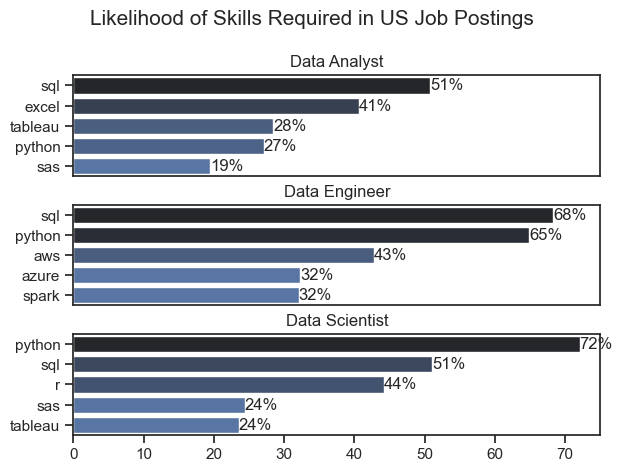

In [23]:

job_titles = df_skills_perc['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3]) #only interested in the Data related roles

fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles): #looping through each job title
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) #filtering for only that job title
    
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', legend=False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0,75)
    
    for n, v in enumerate(df_plot['skill_percent']): #v is the percentage value, n is the index value 
        ax[i].text(v, n, f'{v:.0f}%', va='center' ) #this creates a text with coordinates (v,n)
        
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    
fig.suptitle('Likelihood of Skills Required in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

    





